2023-11-06 14:55:16.275153: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 14:55:16.399530: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI AVX512_BF16, in other operations, rebuild TensorFlow with the appropriate compiler flags.


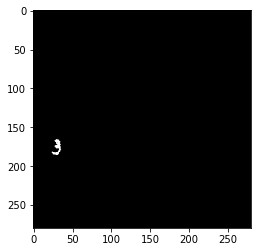

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import math
import random

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255



new_train_images = np.zeros((60000,280,280))
new_train_labels = np.zeros((60000,14))

for i in range(len(new_train_images)):

    randx = random.randrange(0,280-28,1)
    randy = random.randrange(0,280-28,1)

    new_train_images[i,randx:randx+28,randy:randy+28] = train_images[i]
    new_train_labels[i,0] = randx
    new_train_labels[i,1] = randy 
    new_train_labels[i,2] = randx + 28
    new_train_labels[i,3] = randy + 28
    new_train_labels[i,4+train_labels[i]] = 1 



#new_train_images_tensor = tf.convert_to_tensor(new_train_images, dtype=tf.float32)
#new_train_labels_tensor = tf.convert_to_tensor(new_train_labels, dtype=tf.float32)


plt.imshow(new_train_images[10], interpolation="nearest",cmap="gray")






In [2]:
new_train_labels[10]

array([187., 203., 215., 231.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.])

In [5]:
class CustomLoss(tf.keras.losses.Loss):
    def __init__(self):
        super().__init__()

    def call(self, y_true, y_pred):        
        
        truebox = y_true[0:4]
        truelabel = y_true[4:14]

        predbox = y_pred[0:4]
        predlabel = y_pred[4:14]
        
        log_y_pred = tf.math.log(predlabel)
        elements = -tf.math.multiply_no_nan(x=log_y_pred, y=truelabel)
        ce = tf.reduce_mean(tf.reduce_sum(elements,axis=1))
        bbe = (truebox[0]-predbox[0])**2 + (truebox[1]-predbox[1])**2 + (truebox[2]-predbox[2])**2 + (truebox[3]-predbox[3])**2

        return ce + bbe


model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(filters=16,kernel_size=(3,3),strides=1,padding="same",activation="relu", input_shape=(280,280,1)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64,activation="relu"))
model.add(tf.keras.layers.Dense(14))
model.summary()


print(new_train_labels[0])



model.compile(
  optimizer='sgd',
  loss=CustomLoss(),
  metrics=['accuracy'])

num_epochs = 1


model.fit(new_train_images, new_train_labels)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 280, 280, 16)      160       
                                                                 
 flatten_3 (Flatten)         (None, 1254400)           0         
                                                                 
 dense_6 (Dense)             (None, 64)                80281664  
                                                                 
 dense_7 (Dense)             (None, 14)                910       
                                                                 
Total params: 80282734 (306.25 MB)
Trainable params: 80282734 (306.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
[160. 206. 188. 234.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.]


: 